In [1]:
#Importar paquetes
import pandas as pd
import numpy as np
import sqlite3 as sql


In [2]:
import os  ### para ver y cambiar directorio de trabajo

In [6]:
os.getcwd()
os.chdir('C:\\Users\\anita\\OneDrive\\Escritorio\\Universidad\\2022-1\\Aplicación de la analítica\\Marketing\\AnaliticaIII-Marketing')

In [7]:
###### para ejecutar sql y conectarse a bd ###

conn=sql.connect('db_movies')
cur=conn.cursor() ###para funciones que ejecutan sql en base de datos


In [8]:
def ejecutar_sql (nombre_archivo, cur):
    sql_file=open(nombre_archivo)
    sql_as_string=sql_file.read()
    sql_file.close
    cur.executescript(sql_as_string)

In [9]:
#######
############ cargar tablas ####

movies= pd.read_sql('select * from movies', conn)
ratings = pd.read_sql('select * from ratings', conn)

Tabla Movies

In [10]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
#Observar columnas de movies
print('Columnas:',movies.columns)
#Dimensiones de la base
print('Dimensiones:', movies.shape)

Columnas: Index(['movieId', 'title', 'genres'], dtype='object')
Dimensiones: (9742, 3)


In [12]:
#Conocer el tipo de variables
print(movies.dtypes)

movieId     int64
title      object
genres     object
dtype: object


In [13]:
#Información general
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


Tabla Ratings

In [14]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [15]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [16]:
#Observar columnas de movies
print('Columnas:',ratings.columns)
#Dimensiones de la base
print('Dimensiones:', ratings.shape)

Columnas: Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
Dimensiones: (100836, 4)


In [17]:
#Conocer el tipo de variables
print(ratings.dtypes)

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object


In [18]:
from datetime import datetime
datetime.fromtimestamp(964982703)

datetime.datetime(2000, 7, 31, 4, 45, 3)

In [19]:
#Modificar formato de timestamp a datetime
from datetime import datetime
ratings['timestamp']= ratings.apply(lambda x: datetime.fromtimestamp(x['timestamp']), axis=1)
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-31 04:45:03
1,1,3,4.0,2000-07-31 04:20:47
2,1,6,4.0,2000-07-31 04:37:04
3,1,47,5.0,2000-07-31 05:03:35
4,1,50,5.0,2000-07-31 04:48:51


Nueva base de datos

In [20]:
#Crear base de datos con la unión de las tablas de movies y ratings
movie_ratings = pd.merge(ratings,movies, how="left", right_on="movieId", left_on="movieId")
movie_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,2000-07-31 04:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-31 04:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-31 04:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-31 05:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-31 04:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [21]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     100836 non-null  int64         
 1   movieId    100836 non-null  int64         
 2   rating     100836 non-null  float64       
 3   timestamp  100836 non-null  datetime64[ns]
 4   title      100836 non-null  object        
 5   genres     100836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 5.4+ MB


In [22]:
#Verificar si hay datos duplicados 
movie_ratings.duplicated().sum()

0

In [23]:
#Observar columnas de la nueva base de datos
movie_ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres'], dtype='object')

In [24]:
genres = movies.copy()
genres = genres.drop(columns=['movieId', 'title'])
genres['genres'] = genres['genres'].str.split('|')
genres_dummies = pd.get_dummies(pd.DataFrame(genres['genres'].tolist()).stack()).sum(level=0)
genres = pd.concat([genres, genres_dummies], axis=1).drop(columns=['genres'])
genres

C:\Users\anita\AppData\Local\Temp\ipykernel_6192\61964192.py:4: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  genres_dummies = pd.get_dummies(pd.DataFrame(genres['genres'].tolist()).stack()).sum(level=0)


,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
movies2 = pd.concat([movies, genres], axis=1)
movies2 = movies2.drop(['genres'], axis=1)
movies2.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
movies3 = pd.melt(movies2, id_vars= ['movieId', 'title'])
print(movies3.columns)


Index(['movieId', 'title', 'variable', 'value'], dtype='object')


In [27]:
movies3.sample(10)

,movieId,title,variable,value
159197,4500,Drowning by Numbers (1988),Sci-Fi,0
140738,6358,Kiss Me Kate (1953),Mystery,0
107590,491,"Man Without a Face, The (1993)",Horror,0
99066,2195,Dirty Work (1998),Film-Noir,0
59765,1762,Deep Rising (1998),Crime,0
175011,164375,All Roads Lead to Rome (2016),Thriller,0
95741,99114,Django Unchained (2012),Fantasy,0
181698,49132,Shut Up & Sing (2006),War,0
114662,83134,Tucker & Dale vs Evil (2010),Horror,1
30958,2327,Tales from the Darkside: The Movie (1990),Animation,0


In [28]:
movies3.groupby('variable')[['value']].sum().reset_index()

,variable,value
0,(no genres listed),34.0
1,Action,1828.0
2,Adventure,1263.0
3,Animation,611.0
4,Children,664.0
5,Comedy,3756.0
6,Crime,1199.0
7,Documentary,440.0
8,Drama,4361.0
9,Fantasy,779.0


In [29]:
movie_ratings1 = pd.merge(ratings,movies2, how="left", right_on="movieId", left_on="movieId")


Anális Exploratorio

In [33]:
pip install plotly

     ---------------------------------------- 15.2/15.2 MB 6.4 MB/s eta 0:00:00
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\anita\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [35]:
pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 6.1 MB/s eta 0:00:00
     -------------------------------------- 944.1/944.1 KB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 KB ? eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 6.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\anita\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [36]:
import plotly.graph_objs as go #Graficos
import plotly.express as px
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt ### gráficos

In [38]:
# crear dataset
base = movie_ratings.groupby(['title'])[['rating']].count().sort_values('rating', ascending = False).reset_index().head(10)

# crear gráfica
fig = px.bar(base, x = 'title', y='rating',
             title= '<b>Películas más calificadas<b>',
             color_discrete_sequence=px.colors.qualitative.G10)

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Películas',
    yaxis_title = 'Calificación',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [39]:
# ARREGLAR
# crear dataset
base = movies3.groupby(['variable'])[['value']].sum().sort_values('value', ascending = False).reset_index()

# crear gráfica
fig = px.pie(base, values = 'value', names ='variable',
             title= '<b>Participación por barrio en el valor de los edificios vendidos<b>',
             color_discrete_sequence=px.colors.qualitative.G10)

# agregar detalles a la gráfica
fig.update_layout(
    template = 'simple_white',
    title_x = 0.5)

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [40]:
final_dataset = movie_ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset = final_dataset.fillna(0)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
#saber cuantas calificaciones tiene cada pelicula
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
#saber cuantas veces han calificado cada película
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')


In [42]:
print(no_movies_voted.max())
print(no_movies_voted.min())

2698
20


In [43]:
print(no_user_voted.min())
print(no_user_voted.max())

1
329


<AxesSubplot:title={'center':'Ratings por usuario'}, ylabel='Ratings'>

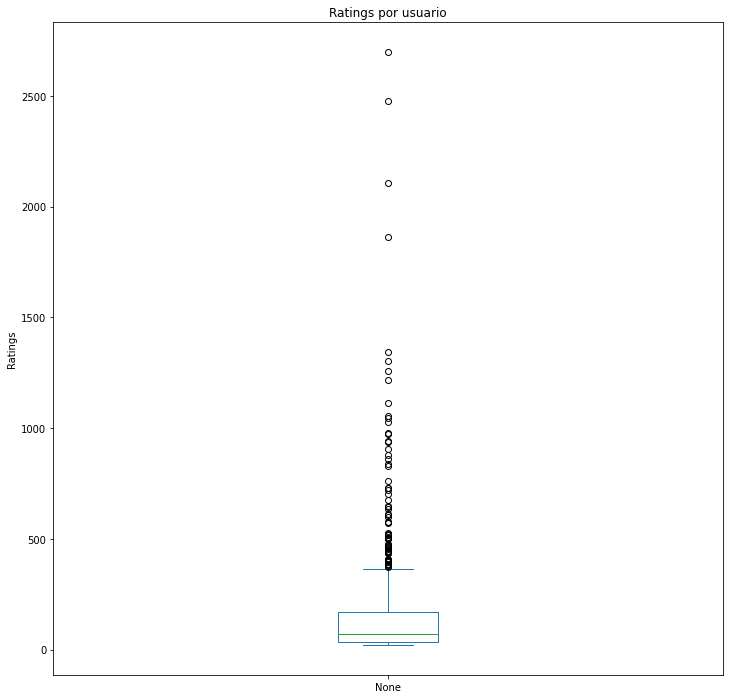

In [44]:
rated_movies_by_user = ratings.groupby("userId").size().sort_values(ascending=False)
rated_movies_by_user.plot.box(figsize=(12,12), ylabel="Ratings", title='Ratings por usuario')

In [49]:
#promedio de calificaciones por usuario
rated_movies_by_user = ratings.groupby("userId").size().mean()
rated_movies_by_user

165.30491803278687

In [51]:
#promedio de calificaciones por usuario
rated_movies_by_user = ratings.groupby("movieId").size().mean()
rated_movies_by_user

10.369806663924312

<AxesSubplot:title={'center':'Ratings por usuario'}, ylabel='Ratings'>

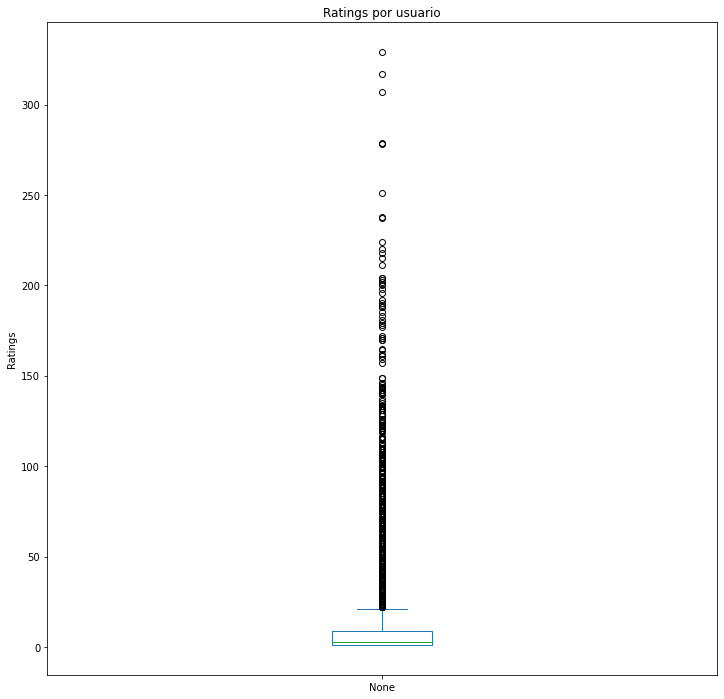

In [50]:
#Boxplot de calificaciones por usuario en peliculas
rated_movies_by_user = ratings.groupby("movieId").size().sort_values(ascending=False)
rated_movies_by_user.plot.box(figsize=(12,12), ylabel="Ratings", title='Ratings por usuario')
#Criterio de seleccion de la base: 1. Usuarios calificacion > 10 peliculas y peliculas calificadas > 100 veces

In [53]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]
final_dataset

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 100].index]
final_dataset

userId,1,4,6,7,10,15,17,18,19,20,...,599,600,601,602,603,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,2.5,4.5,3.5,4.0,0.0,...,3.0,2.5,4.0,0.0,4.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,...,2.5,4.0,0.0,4.0,0.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,4.5,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.5,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
pip install scikit-surprise

  Using cached scikit-surprise-1.1.1.tar.gz (11.8 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for scikit-surprise, since package 'wheel' is not installed.
  Running setup.py install for scikit-surprise: started
  Running setup.py install for scikit-surprise: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Running setup.py install for scikit-surprise did not run successfully.
  │ exit code: 1
  ╰─> [52 lines of output]
      c:\Users\anita\AppData\Local\Programs\Python\Python310\lib\site-packages\setuptools\dist.py:717: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
        warnings.warn(
      running install
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-3.10
      creating build\lib.win-amd64-3.10\surprise
      copying surprise\accuracy.py -> build\lib.win-amd64-3.10\surprise
      copying surprise\builtin_datasets.py -> build\lib.win-amd64-3.10\surprise
      copying surprise\dataset.py -> build\lib.win-amd64-3.10\surprise
      copying surprise\dump.py -> build\lib.win-amd64-3.10\surprise
      copying surprise\reader.py -> build\lib.win-amd64-3.10\surprise
      copying surprise

In [67]:
pip install scikit-surprise==1.0.4

     ---------------------------------------- 2.3/2.3 MB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for scikit-surprise, since package 'wheel' is not installed.
  Running setup.py install for scikit-surprise: started
  Running setup.py install for scikit-surprise: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Running setup.py install for scikit-surprise did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      c:\Users\anita\AppData\Local\Programs\Python\Python310\lib\site-packages\setuptools\dist.py:717: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
        warnings.warn(
      running install
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-3.10
      creating build\lib.win-amd64-3.10\surprise
      copying surprise\accuracy.py -> build\lib.win-amd64-3.10\surprise
      copying surprise\dataset.py -> build\lib.win-amd64-3.10\surprise
      copying surprise\dump.py -> build\lib.win-amd64-3.10\surprise
      copying surprise\evaluate.py -> build\lib.win-amd64-3.10\surprise
      copying surprise\__init__.py -> build\lib.win-amd64-3.10\surprise
      copying surprise\__mai

In [71]:
import scikit-surprise

SyntaxError: invalid syntax (376283758.py, line 1)

In [70]:
from surprise import Reader, Dataset
from surprise.model_selection import cross_validate, GridSearchCV
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline, SVD
from surprise.model_selection import train_test_split

ModuleNotFoundError: No module named 'surprise'